In [16]:
#Q1:
    
#This function convert base ten to binary number
def decimal_to_binary(n):
    bin_num = 0
    dec_num = 1
    while n > 0:  
        if n % 2 == 0:
            dec_num = dec_num * 10
            n = n/2
        else:
            bin_num += dec_num
            n = n-1
    return bin_num
#This function convert base ten to base 8 number
def decimal_to_octal(n):
    oct_num = 0
    dec_num = 1
    while n > 0:  
        if n % 8 == 0:
            dec_num = dec_num * 10
            n = n/8
        else:
            oct_num +=  dec_num * (n % 8)
            n = n - (n % 8)
    return int(oct_num)
#This function convert base ten to base 16 number
def decimal_to_hexadecimal(n):
    hex_num = ""
    if n==0:
        return "0"
    while n > 0:  
        if n % 16 == 0:
            hex_num = "0" + hex_num
            n = n/16
        else:
            hex = n % 16
            if hex == 10: 
                hex = "A"
            elif hex == 11:
                hex = "B"
            elif hex == 12:
                hex = "C"
            elif hex == 13:
                hex = "D"
            elif hex  == 14:
                hex = "E"
            elif hex == 15:
                hex = "F"
            else:
                hex = str((int)(n % 16))
            hex_num =  hex + hex_num
            n = n - (n % 16)
            n = n/16
    return hex_num
n = int(input("Enter your number: "))
print("Decimal:" ,decimal_to_binary(n))
print("Octal:" ,decimal_to_octal(n))
print("Hex:" ,decimal_to_hexadecimal(n))

Enter your number: 80
Decimal: 1010000
Octal: 120
Hex: 50


In [2]:
#Q2 
import pandas as pd
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [12]:
#1
cast[cast['title'] == 'Hamlet'].drop_duplicates(subset = ['year'])['title'].count()

17

In [11]:
#2
cast[cast['title'] == 'Treasure Island'].drop_duplicates(subset = ['year']).sort_values(by=['year'])

,title,year,name,type,character,n
313097,Treasure Island,1918,Francis Carpenter,actor,Jim Hawkins,1.0
345942,Treasure Island,1920,Lon Chaney,actor,Blind Pew,5.0
8570,Treasure Island,1934,Robert Adair,actor,Tom - Seaman,NaN
12141,Treasure Island,1950,Chris Adcock,actor,Pike,26.0
38151,Treasure Island,1972,Cristino Almod?var,actor,O'Brien,18.0
484325,Treasure Island,1973,Richard Dawson,actor,Long John Silver,1.0
14899,Treasure Island,1985,Yves Afonso,actor,French captain,8.0
104905,Treasure Island,1999,Lance (II) Baker,actor,Frank,1.0


In [10]:
#3
n = cast[(cast['title'] == 'Hamlet') & (cast['year'] == 1921)]['n'].notnull().sum()
print("The number of roles were credited in the silent 1921 version of Hamlet",n)

The number of roles were credited in the silent 1921 version of Hamlet 9


Text(0.5, 0, 'decades')

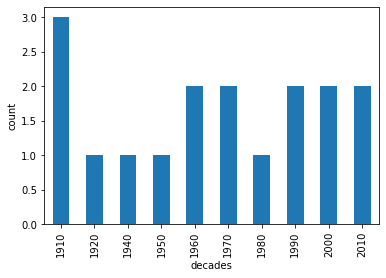

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
movies_decades = cast[cast['title'] == 'Hamlet'].drop_duplicates(subset = ['year']).groupby((cast['year']/10).astype('int') * 10).count()
plt = movies_decades['title'].astype('int').plot.bar(x='count', y='decades')
plt.set_ylabel('count')
plt.set_xlabel('decades')

In [8]:
cast_1950s = cast[(cast['year']  >= 1950) & (cast['year']  < 1960) & (cast['n'] == 1)]
cast1950s1actor = cast_1950s[cast_1950s['type'] == 'actor'].groupby('year').count().rename(columns={'n': 'actor'})['actor']
cast1950s1actress = cast_1950s[cast_1950s['type'] == 'actress'].groupby('year').count().rename(columns={'n': 'actress'})['actress']
print("Leading roles were available to actors, and actresses, in each year of the 1950s")
pd.DataFrame(pd.concat([cast1950s1actor, cast1950s1actress], axis = 1))

Leading roles were available to actors, and actresses, in each year of the 1950s


,actor,actress
year,,
1950,604,271
1951,633,272
1952,591,284
1953,634,290
1954,626,298
1955,606,264
1956,614,288
1957,708,284
1958,694,275


(3333695, 6)